In [21]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 불러오기

In [23]:
pd.set_option("display.max_columns", None)
df = pd.read_csv('./datasets/creditcard.csv')
print(df.head())
print(df.info())
print(df.describe())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20 

0    284315
1       492
Name: Class, dtype: int64

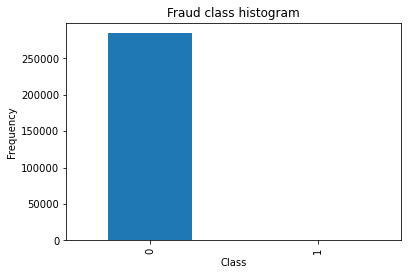

In [3]:
pd.value_counts(df['Class']).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
df['Class'].value_counts()

# 스케일링

In [4]:
# from sklearn.preprocessing import StandardScaler

# data['normAmount'] = StandardScaler().fit_transform(data['Amount'].reshape(-1, 1))
# data = data.drop(['Time', 'Amount'], axis=1)
# data.head()

In [24]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

target = 'Time'
data = df[target].values.reshape(-1, 1)
print('\nTime_unscaled : \n' , data)
df[target] = robust_scaler.fit_transform(data)
print('\nTime_scaled : \n' , data)

target = 'Amount'
data = df[target].values.reshape(-1, 1)
print('\nAmount_unscaled : \n' ,data)
df[target] = robust_scaler.fit_transform(data)
print('\nAmount_scaled : \n' ,data)



Time_unscaled : 
 [[0.00000e+00]
 [0.00000e+00]
 [1.00000e+00]
 ...
 [1.72788e+05]
 [1.72788e+05]
 [1.72792e+05]]

Time_scaled : 
 [[-0.99498349]
 [-0.99498349]
 [-0.99497175]
 ...
 [ 1.03497457]
 [ 1.03497457]
 [ 1.03502156]]

Amount_unscaled : 
 [[149.62]
 [  2.69]
 [378.66]
 ...
 [ 67.88]
 [ 10.  ]
 [217.  ]]

Amount_scaled : 
 [[ 1.78327395]
 [-0.26982463]
 [ 4.98372109]
 ...
 [ 0.64109551]
 [-0.16767973]
 [ 2.72479564]]


# 스플릿

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

X = df.drop('Class', axis=1)
y = df['Class']

print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

print("x_train dataset: ", x_train.shape)
print("y_train dataset: ", y_train.shape)
print("x_test dataset: ", x_test.shape)
print("y_test dataset: ", y_test.shape)

print(type(x_train))
print(type(x_test))

Shape of X: (284807, 30)
Shape of y: (284807,)
x_train dataset:  (227845, 30)
y_train dataset:  (227845,)
x_test dataset:  (56962, 30)
y_test dataset:  (56962,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


# 샘플링 
# (+ 결과 pickle 저장_샘플링 시간 절약)

최종 적용할 샘플링 기법 : SMOTE ADASYN CNN SMOTE + ENN ADASYN + ENN

참고용으로 확인해 볼 샘플링 기법 : TomekLink SMOTE + TomekLink

=> 우리가 사용하는 데이터에서는 Tomek Link 쌍이 없기 때문에 사용할 의미가 없다.

random_state는 2로 통일

In [27]:
%%time

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.combine import SMOTEENN

X_samples = {'Raw': x_train}
y_samples = {'Raw': y_train}

#n_jobs : 시간 단축 위해
samplers = {'SMOTE' : SMOTE(random_state=2,n_jobs=-1)}
#             ,'ADASYN': ADASYN(random_state=2,n_jobs=-1),
#             'CNN'   : CondensedNearestNeighbour(random_state=2,n_jobs=-1),
#             'SMOTEENN': SMOTEENN(random_state=2,n_jobs=-1)}
            
for name, sampler in samplers.items():
    
    print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
    print("Before OverSampling, counts of label '0': {}".format(sum(y_train==0)))
  
    X_train_res, y_train_res = sampler.fit_resample(x_train, y_train) 
    X_samples[name], y_samples[name] = X_train_res,y_train_res #dict

    print('\nX_samples : ',len(X_samples), 'y_samples : ',len(y_samples))
    
    print('After OverSampling, the shape of train_x_: {}'.format(X_train_res.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
    
    print("After OverSampling, counts of label '1': {}".format(sum(y_samples[name]==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_samples[name]==0)))

    
with open('x_samples.pickle','wb')as f:
    pickle.dump(X_samples,f,pickle.HIGHEST_PROTOCOL)
with open('y_samples.pickle','wb')as f:
    pickle.dump(y_samples,f,pickle.HIGHEST_PROTOCOL)

Before OverSampling, counts of label '1': 408
Before OverSampling, counts of label '0': 227437

X_samples :  2 y_samples :  2
After OverSampling, the shape of train_x_: (454874, 30)
After OverSampling, the shape of train_y: (454874,) 

After OverSampling, counts of label '1': 227437
After OverSampling, counts of label '0': 227437
Wall time: 1.66 s


In [32]:
%%time

x_tests = {'Raw': x_test}
y_tests = {'Raw': y_test}

with open('X_test.pickle','wb')as f:
    pickle.dump(x_test,f,pickle.HIGHEST_PROTOCOL)
with open('y_test.pickle','wb')as f:
    pickle.dump(y_test,f,pickle.HIGHEST_PROTOCOL)

Wall time: 20.9 ms
